<h1>Kod własny</h1>

In [ ]:
!pip install fastquant
!pip install finta
!pip install python-binance

In [ ]:
import requests
import pandas as pd
import numpy as np
from finta import TA
from datetime import date, timedelta, datetime
from urllib.parse import urljoin, urlencode
import time
import json
import matplotlib.pyplot as plt
from binance.client import Client
client = Client('', '')


In [ ]:
df = client.get_historical_klines(symbol='DOGEUSDT', interval='15m', start_str='01 May 2022', end_str='5 May 2022')
df = pd.DataFrame(df, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'dt', 
                                    'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
                                    'Taker buy quote asset volume', 'Ignore'])
df = df.filter(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume' ])

df['20SMA'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
df['50SMA'] = df['Close'].rolling(window = 50, min_periods = 1).mean()

df['Signal'] = 0.0
df['Signal'] = np.where(df['20SMA'] > df['50SMA'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()

In [ ]:
df['Close'] = df['Close'].astype(float)

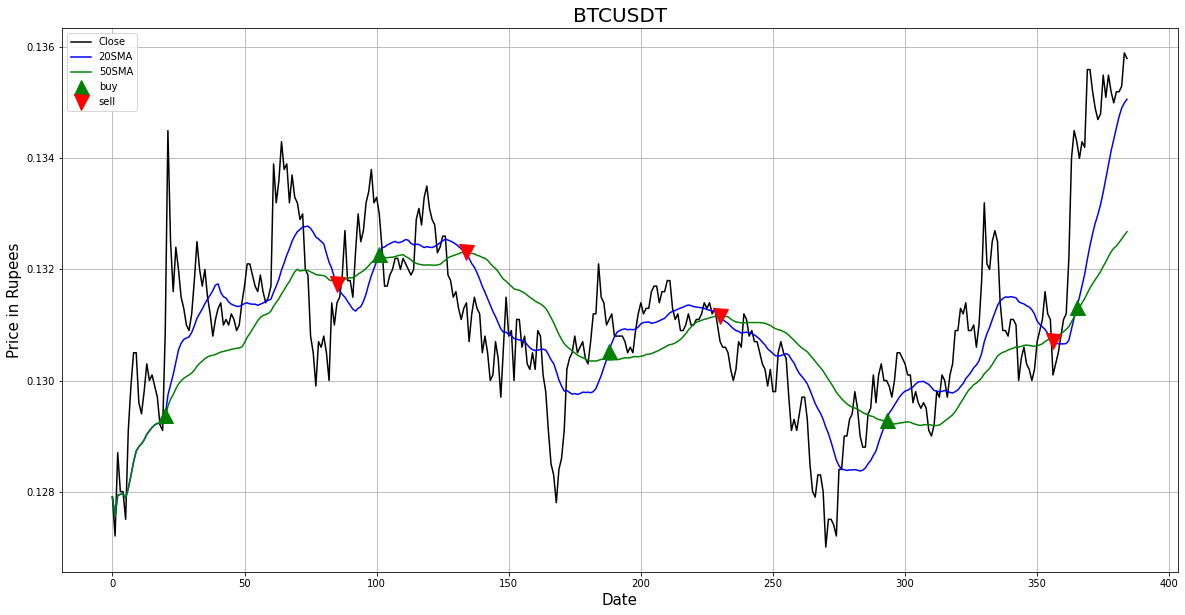

In [ ]:
plt.figure(figsize = (20,10))

df['Close'].plot(color = 'k', label= 'Close')
df['20SMA'].plot(color = 'b', label = '20SMA') 
df['50SMA'].plot(color = 'g', label = '50SMA')

plt.plot(df[df['Position'] == 1].index, 
         df['20SMA'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')

plt.plot(df[df['Position'] == -1].index, 
         df['20SMA'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')

plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('BTCUSDT', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
money = 1000
position = 0

for n in range(0, len(df)):

  if df['Position'][n] == 1 and position == 0:
    money = money/df['Close'][n]
    position = 1
    print(df['Open time'][n], 'BUY', money )

  elif df['Position'][n] == -1 and position == 1 :
    money = money*df['Close'][n]
    position = 0
    print(df['Open time'][n], 'SELL', money)

  elif n==len(df)-1 and position == 1 :
    money = money*df['Close'][n]
    position = 0
    print(df['Open time'][n], 'SELL', money)

  else:
    pass

1651381200000 BUY 7639.419404125287
1651439700000 SELL 1003.8197097020626
1651454100000 BUY 7547.516614301222
1651483800000 SELL 991.7436831191804
1651532400000 BUY 7564.787819368272
1651570200000 SELL 988.7177679914332
1651626900000 BUY 7605.521292241794
1651683600000 SELL 989.4783201206574
1651691700000 BUY 7367.671780496332
1651708800000 SELL 1000.5298277914019


<h1>Fastquant</h1>

In [ ]:
!pip install fastquant


In [ ]:
from fastquant import backtest

In [ ]:
client = Client('','') 
candles = client.get_historical_klines(symbol='DOGEUSDT', interval='15m', start_str='01 May 2022', end_str='5 May 2022')


In [ ]:
df = pd.DataFrame(candles, columns=['Open time', 'Open', 'High', 'Low', 'close', 'Volume', 'dt', 
                                    'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
                                    'Taker buy quote asset volume', 'Ignore'])
df = df.filter(['dt', 'close'])
df.set_index('dt', inplace=True)
df = df.filter(['dt', 'close'])
df['close'] = df['close'].astype(float)

Starting Portfolio Value: 1000.00
1970-01-01T00:27:31.709699, ===Global level arguments===
1970-01-01T00:27:31.709699, init_cash : 1000
1970-01-01T00:27:31.709699, buy_prop : 1
1970-01-01T00:27:31.709699, sell_prop : 1
1970-01-01T00:27:31.709699, commission : 0.00075
1970-01-01T00:27:31.709699, stop_loss : 0
1970-01-01T00:27:31.709699, stop_trail : 0
1970-01-01T00:27:31.709699, take_profit : 0
1970-01-01T00:27:31.709699, allow_short : False
===Strategy level arguments===
fast_period : 10
slow_period : 30
1970-01-01T00:27:31.709699, Final Portfolio Value: 985.3975266750001
1970-01-01T00:27:31.709699, Final PnL: -14.6
Time used (seconds): 0.4979679584503174
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:1000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0.00075	stop_loss:0	stop_trail:0	take_

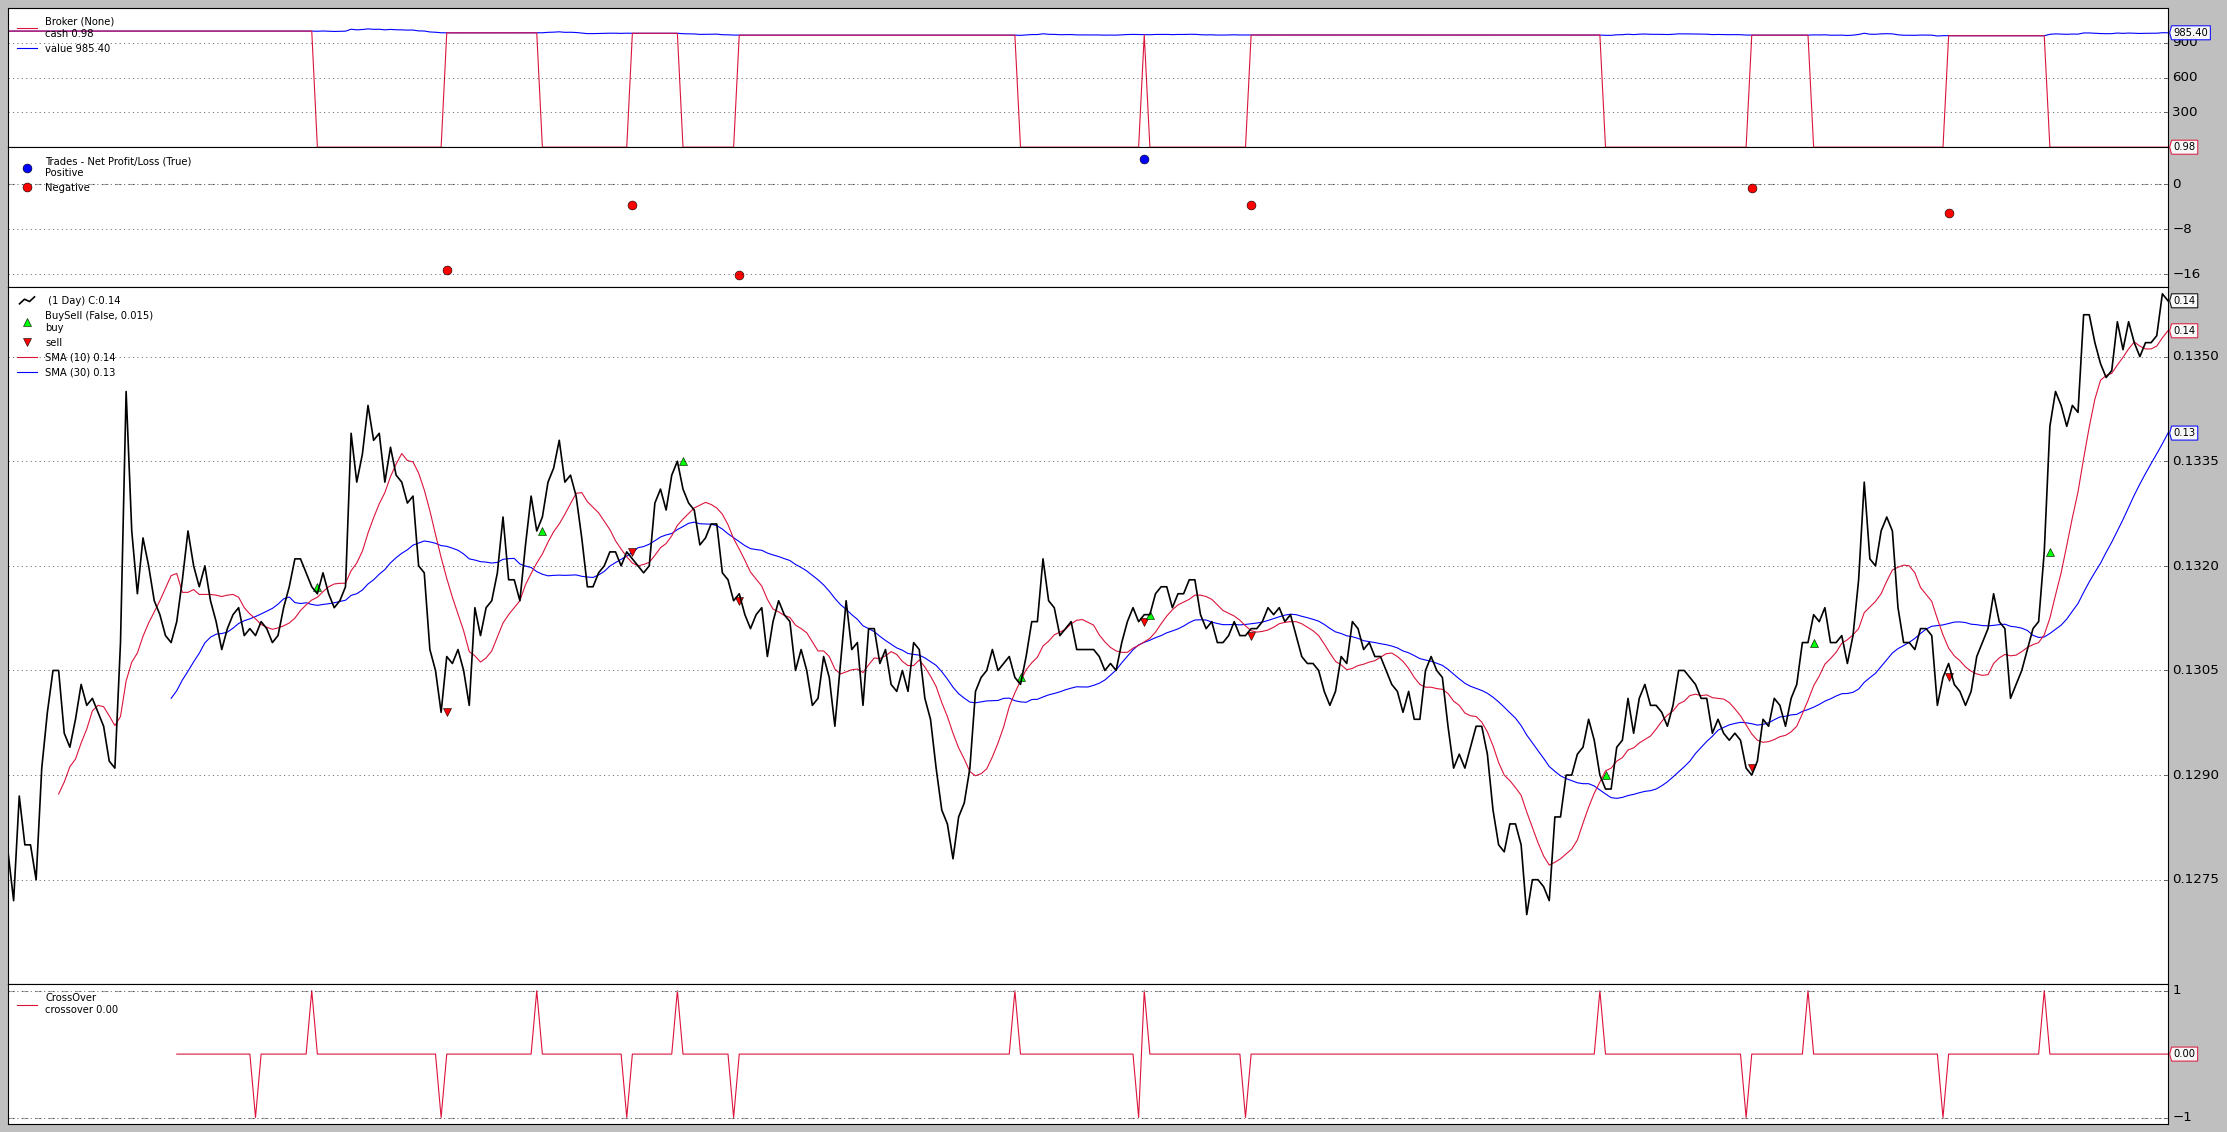

In [ ]:
q = backtest('smac', df, fast_period=10, slow_period=30, commission = 0.01*0.075, allow_short=False, init_cash=1000)


<h1>Backtesting</h1>

In [ ]:
!pip install backtesting

In [ ]:
candles = client.get_historical_klines(symbol='DOGEUSDT', interval='5m', start_str='1 Apr 2022', end_str='5 May 2022')

df = pd.DataFrame(candles, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'dt', 
                                    'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
                                    'Taker buy quote asset volume', 'Ignore'])
df = df.filter(['Open', 'High', 'Low', 'Close', 'Volume'])

In [ ]:
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Close'] = df['Close'].astype(float)
df['Volume'] = df['Volume'].astype(float)


In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 30)
        self.ma2 = self.I(SMA, price, 60)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


bt = Backtest(df, SmaCross, cash=1000, commission = 0,
              exclusive_orders=True)
stats = bt.run()
bt.plot()


Row(id='5553', ...)

In [ ]:
stats

Start                                       0
End                                      9792
Duration                                 9792
Exposure Time [%]                     99.1627
Equity Final [$]                      1103.89
Equity Peak [$]                       1168.09
Return [%]                            10.3891
Buy & Hold Return [%]                -1.94946
Return (Ann.) [%]                           0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                                0
Max. Drawdown [%]                     -21.112
Avg. Drawdown [%]                    -2.81113
Max. Drawdown Duration                   4964
Avg. Drawdown Duration                254.658
# Trades                                  190
Win Rate [%]                          41.0526
Best Trade [%]                         18.808
Worst Trade [%]                      -13.6247
Avg. Trade [%]                    

<h1>Random Forest</h1>

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') 
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

In [ ]:
import pandas_datareader as web
import talib as ta
import math


In [ ]:
start = "2020-01-01"
end = "2022-04-01"

In [ ]:
btc = client.get_historical_klines(symbol='BTCUSDT', interval='1d', start_str='01 Jan 2020', end_str = '10 May 2022' )
btc = pd.DataFrame(btc, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 
									'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
									'Taker buy quote asset volume', 'Ignore'])
btc = btc.filter(['Open time','Open','High','Low','Close','Volume'	]).set_index('Open time')


ltc = client.get_historical_klines(symbol='LTCUSDT', interval='1d', start_str='01 Jan 2020', end_str = '10 May 2022' )
ltc = pd.DataFrame(ltc, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 
									'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
									'Taker buy quote asset volume', 'Ignore'])
ltc = ltc.filter(['Open time','Open','High','Low','Close','Volume'	]).set_index('Open time')


doge = client.get_historical_klines(symbol='DOGEUSDT', interval='1d', start_str='01 Jan 2020', end_str = '10 May 2022' )
doge = pd.DataFrame(doge, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 
									'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
									'Taker buy quote asset volume', 'Ignore'])
doge = doge.filter(['Open time','Open','High','Low','Close','Volume'	]).set_index('Open time')

In [ ]:
asset_list = [btc, ltc, doge]

def indicators(asset):
    asset["RSI"] = ta.RSI(asset["Close"], timeperiod = 14)
    asset["ROC"] = ta.ROC(asset["Close"], timeperiod = 10)
    asset["%R"] = ta.WILLR(asset["High"], asset["Low"], asset["Close"], timeperiod = 14)
    asset["OBV"] = ta.OBV(asset["Close"], asset["Volume"])
    asset["MACD"], asset["MACD_SIGNAL"], asset["MACD_HIST"] = ta.MACD(asset["Close"], fastperiod=12, slowperiod=26, signalperiod=9)
    asset["Prediction"] = np.where(asset["Close"].shift(-10) > asset["Close"], 1, -1)


In [ ]:
for asset in asset_list:
    indicators(asset)


df = btc.append((ltc, doge))
df.dropna(inplace = True)
df['Prediction'].value_counts()
df['Volume'] = df['Volume'].astype(float)

In [ ]:
from sklearn.model_selection import train_test_split

X = df[["RSI", "ROC", "OBV","%R", "MACD", "MACD_SIGNAL", "MACD_HIST", 'Volume']]
y = df[["Prediction"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = 0.8, test_size=0.2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "entropy", random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print("Accuracy %: ", accuracy_score(y_test, y_pred, normalize= True)*100)

Accuracy %:  76.45875251509054


In [ ]:
test_stock = client.get_historical_klines(symbol='ETHUSDT', interval='1d', start_str='01 Jan 2020', end_str = '10 May 2022' )
test_stock = pd.DataFrame(test_stock, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 
									'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
									'Taker buy quote asset volume', 'Ignore'])

test_stock = test_stock.filter(['Open time','Open','High','Low','Close','Volume'])
indicators(test_stock)
test_stock['Open time'] = pd.to_datetime(test_stock['Open time'], unit='ms')
test_stock.set_index('Open time', inplace=True)
test_stock.dropna(inplace=True)
test_stock['Close'] = test_stock['Close'].astype(float)
test_stock['Volume'] = test_stock['Volume'].astype(float)

In [ ]:
test_stock["predicted"] = model.predict(test_stock[["RSI", "ROC", "OBV","%R", "MACD", "MACD_SIGNAL", "MACD_HIST", 'Volume']])
test_stock.head()


,Open,High,Low,Close,Volume,RSI,ROC,%R,OBV,MACD,MACD_SIGNAL,MACD_HIST,Prediction,predicted
Open time,,,,,,,,,,,,,,
2020-02-03,188.48000000,195.19000000,186.62000000,189.69,417175.95781,72.587242,16.703581,-13.874874,3.170835e+06,12.627998,12.763542,-0.135544,1,-1
2020-02-04,189.74000000,191.60000000,184.69000000,188.91,366389.69686,71.560839,17.811038,-15.842583,2.804445e+06,12.507191,12.712272,-0.205080,1,-1
2020-02-05,188.91000000,207.61000000,188.19000000,203.78,550942.11417,77.959397,21.398785,-7.356896,3.355387e+06,13.456221,12.861062,0.595160,1,-1
2020-02-06,203.78000000,216.33000000,201.02000000,213.19,608240.22330,80.889605,25.346896,-5.166173,3.963627e+06,14.797071,13.248264,1.548808,1,-1
2020-02-07,213.16000000,225.00000000,213.14000000,223.33,629361.15466,83.443874,27.152129,-2.478112,4.592988e+06,16.487856,13.896182,2.591674,1,-1


In [ ]:
test_stock['Close']

Open time
2020-02-03     189.69
2020-02-04     188.91
2020-02-05     203.78
2020-02-06     213.19
2020-02-07     223.33
               ...   
2022-05-06    2692.85
2022-05-07    2635.34
2022-05-08    2519.71
2022-05-09    2228.55
2022-05-10    2342.05
Name: Close, Length: 828, dtype: float64

In [ ]:
def buy_sell(asset):
    BuyPrice = []
    SellPrice = []
    flag = -1
    counter = 0
    n=10
    
    for i in range(len(asset)):
        if asset["predicted"][i] == 1 and counter == 0:
            if flag != 1:
                BuyPrice.append(asset["Close"][i])
                SellPrice.append(np.nan)
                flag = 1
            else:
                BuyPrice.append(np.nan)
                SellPrice.append(np.nan)
        elif asset["predicted"][i] == -1 and counter == 0:
            if flag !=0:
                BuyPrice.append(np.nan)
                SellPrice.append(asset["Close"][i])
                flag = 0
            else:
                BuyPrice.append(np.nan)
                SellPrice.append(np.nan)
        else:
            BuyPrice.append(np.nan)
            SellPrice.append(np.nan)
            
        counter +=1
        if counter == n:
            counter = 0
    return (BuyPrice, SellPrice)


In [ ]:
buysell = buy_sell(test_stock)
test_stock["Buy"] = buysell[0]
test_stock["Sell"] = buysell[1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


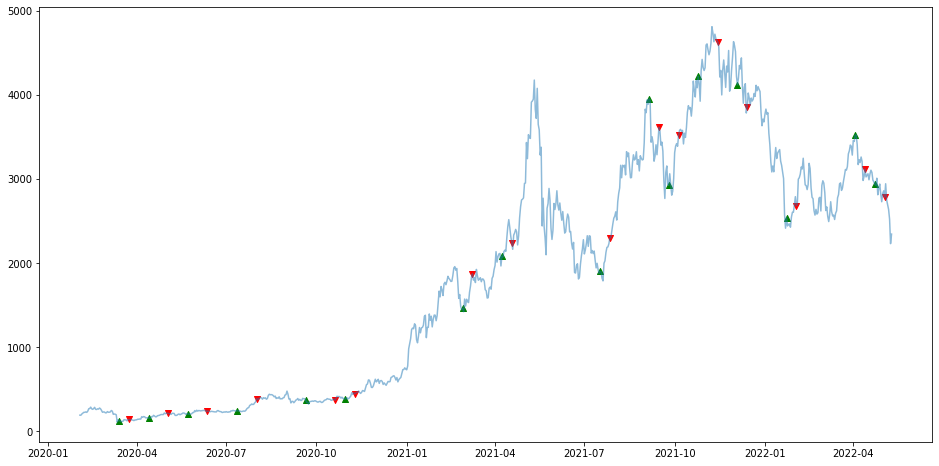

In [ ]:
test_stock["Sell"][0] = np.nan
plt.figure(figsize=(16,8))
plt.scatter(test_stock.index, test_stock["Buy"], color = "green", label = "Buy", marker = "^", alpha=1)
plt.scatter(test_stock.index, test_stock["Sell"], color = "red", label = "Sell", marker = "v", alpha=1)
plt.plot(test_stock.index, test_stock["Close"], alpha = 0.5)
plt.show()

In [ ]:
def performance(data):
    performance = [1000]
    num_stocks = 0
    for i in range(len(data)):
        if math.isnan(data["Buy"][i]) == False:
            num_stocks = performance[i]/data["Close"][i]
            performance.append(num_stocks*data["Close"][i])
        elif math.isnan(data["Sell"][i]) == False:
            cash = num_stocks * data["Close"][i]
            performance.append(cash)
        else: 
            performance.append(performance[i])
            
    return performance


In [ ]:
test_stock["Buy"] = test_stock["Buy"].astype(float)
test_stock["Sell"] = test_stock["Sell"].astype(float)

In [ ]:
test_stock_performance = performance(test_stock)
test_stock_performance


[1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000.0000000000001,
 1000.0000000000001,
 1000.0000000000001,
 1000.0000000000001,
 1000.0000000000001,
 1000.0000000000001,
 1000.0000000000001,
 1000.0000000000001,
 1000.0000000000001,
 1000.0000000000001,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,
 1129.5903378488656,

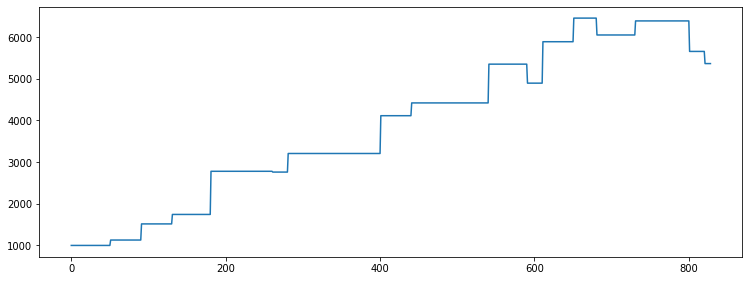

In [ ]:
plt.figure(figsize= (12.6, 4.6))
plt.plot(test_stock_performance)